# Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Dataset - Diabetes Dataset

### About Dataset
Pada tugas ini, saya menggunakan dataset "[Student Study Hours](https://www.kaggle.com/datasets/himanshunakrani/student-study-hours)" yang saya ambil dari kaggle

Data terdiri dari Nilai siswa termasuk waktu belajar & jumlah mata kuliah. Dataset ini diunduh dari Repositori Pembelajaran Mesin UCI.

# Import the dataset

In [28]:
dataset = pd.read_csv("score_updated.csv")
# X = dataset.iloc[:, 1:-1].values
# Y = dataset.iloc[:, 2].values

dataset.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Preprocessing

In [29]:
# checking for null values
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [30]:
dataset.describe()

,Hours,Scores
count,96.000000,96.000000
mean,5.267708,54.020833
std,2.503030,25.017459
min,1.000000,12.000000
25%,3.075000,30.750000
50%,5.250000,54.500000
75%,7.325000,74.250000
max,9.800000,99.000000


In [54]:
X = dataset.iloc[:, 0 : -1 ].values # Hours
Y = dataset.iloc[:, -1 ].values # Scores
print(X)
print(Y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]
 [4.2]
 [9.5]
 [5.8]
 [2.3]
 [4.7]
 [1.6]
 [9. ]
 [6.2]
 [8.1]
 [3.9]
 [2.2]
 [7.1]
 [6.3]
 [5.3]
 [4.4]
 [1.8]
 [9.4]
 [6.7]
 [3.7]
 [7.3]
 [4.1]
 [8. ]
 [3.1]
 [1.3]
 [5.7]
 [2.8]
 [7.9]
 [6.6]
 [3.6]
 [2.4]
 [4.6]
 [8.4]
 [1.7]
 [5.2]
 [6.4]
 [7.6]
 [9.3]
 [3.4]
 [2.1]
 [5.4]
 [8.2]
 [1.4]
 [9.6]
 [6.8]
 [7.5]
 [4.3]
 [6.5]
 [8.7]
 [3. ]
 [2.9]
 [1.2]
 [9.7]
 [4.9]
 [5.6]
 [8.6]
 [2.6]
 [7.2]
 [1. ]
 [6. ]
 [4. ]
 [5. ]
 [6.8]
 [2. ]
 [3. ]
 [7. ]
 [9.8]
 [5.8]
 [4.4]
 [6.1]
 [3.7]
 [8. ]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86 49 90 63 23 50 19 92 68 82 38 22 73 66 56 45 21 93 71 37 77 44 79 28
 16 59 29 80 72 36 26 48 84 18 53 64 78 94 33 20 55 83 15 98 74 70 43 65
 87 27 31 14 96 51 57 89 32 72 12 61 40 52 67 18 34 73 99 60 44 63 37 84]


# Establish features scaling

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [69]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
y_train = y_train.reshape(-1, 1)
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

# Create a SVR object for Regression from SVM library

In [85]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf') 
regressor_linear = SVR(kernel='linear')

# Fit the dataset

In [86]:
regressor.fit(X_train,y_train)


c:\Kuliah\Semester 6\Machine Learning\Tugas_2\venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [87]:
regressor_linear.fit(X_train,y_train)

c:\Kuliah\Semester 6\Machine Learning\Tugas_2\venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

# Predict the result

In [88]:
y_pred = regressor.predict(X_test)


print("Predicted value:", y_pred)

Predicted value: [ 1.52832285 -0.52608335 -0.89146057 -0.23601861  0.65994633  0.79818074
 -1.17598601  0.22215437 -1.2126323  -1.47224665 -0.71309123 -0.97684023
  0.55805562 -0.84777372  0.18006449 -1.44082045 -0.62054203  1.02225919
  1.14023057  1.21810161]


In [89]:
y_pred_linear = regressor_linear.predict(X_test)


print("Predicted value:", y_pred_linear)

Predicted value: [ 1.70184281 -0.49811706 -0.81811123 -0.25812144  0.62186251  0.78185959
 -1.09810612  0.14187127 -1.13810539 -1.53809809 -0.65811414 -0.89810977
  0.5018647  -0.77811195  0.101872   -1.45809955 -0.5781156   1.02185522
  1.14185303  1.22185157]


In [90]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)


0.021647042856380548

In [91]:
mean_squared_error(y_test, y_pred_linear)

0.022301773403544008

# Visualisation the regression result

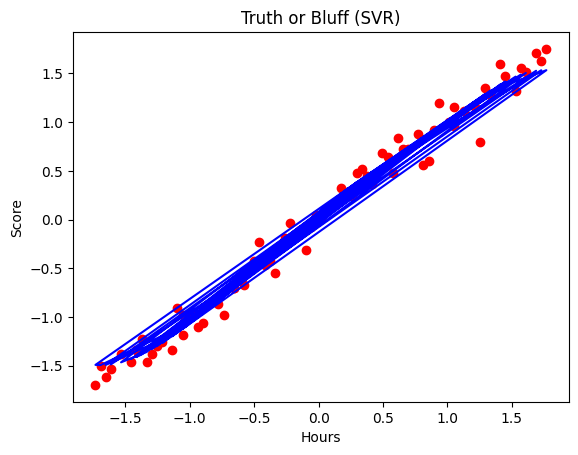

In [96]:
plt.scatter( X_train, y_train, color = 'red' )
plt.plot( X_train, regressor.predict(X_train), color = 'blue')
plt.title( 'Truth or Bluff (SVR)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

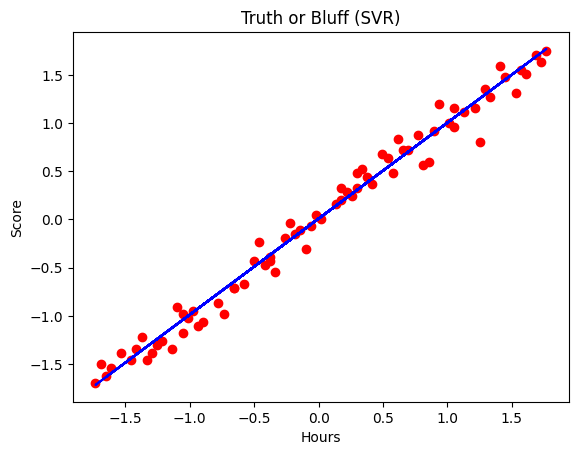

In [93]:
plt.scatter( X_train, y_train, color = 'red' )
plt.plot( X_train, regressor_linear.predict(X_train), color = 'blue')
plt.title( 'Truth or Bluff (SVR)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()